# Logistic Regression with a Neural Network mindset

This code is about building a logistic regression classifier to recognize cats. Following code will step you through how to do this with a Neural Network mindset!

## 1 - Packages ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image      
from lr_utils import load_dataset

%matplotlib inline

## 2 - Overview of the Dataset ##

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


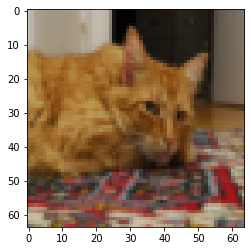

In [3]:
# Example of a picture
index = 97


plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")


In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


##  Reshaping the training and test set  ##

In [5]:
# Reshape the training and test examples


train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


## 3- Preprocessing Step ##

In [6]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

## 4 - Building the parts of our algorithm ## 


### 4.1 - Helper functions

In [7]:
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
    
    return s

### 4.2 - Initializing parameters

In [8]:
def initialize_with_zeros(dim):
    
    w = np.zeros([dim,1])
    b = 0
    
    return w, b

### 4.3 - Forward and Backward propagation

In [9]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    A=sigmoid((np.dot(w.T, X)+ b)) # compute activation
    cost= np.sum ( (Y*np.log(A) ) + ( (1-Y) * np.log((1-A)) ) ) / -m  # compute cost
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    
    dw= np.dot( X,(A-Y).T ) / m
    db= np.sum((A-Y))/ m
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### 4.4 - Optimization

In [10]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
         
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w= w - (learning_rate * dw )
        b= b - (learning_rate * db )
        
        # Record the costs every 100 training iterations 
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### 4.5 - Predict function

In [11]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    
    A = sigmoid((np.dot(w.T, X)+ b))
    
    # Classify cat being present in the picture if A > 0.5
    Y_prediction= A > 0.5
    Y_prediction= 1 * Y_prediction
         
    return Y_prediction

## 5 - Merge all functions into a model ##

In [12]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.005, print_cost=False):
   
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Final Step - Main model ##

In [13]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)


train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


## Learning Curve Graph ##

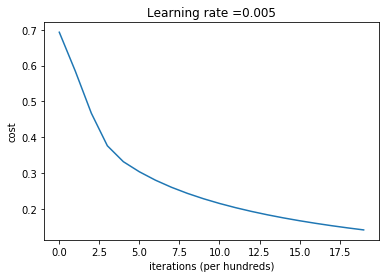

In [14]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## 6 - Let's Play and do some Further analysis ##

#### Choice of learning rate ####

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



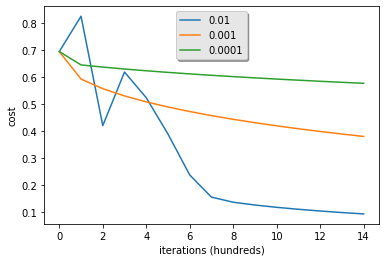

In [15]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## 7 - Test with your own image  ##

y = 0, your algorithm predicts a "non-cat" picture.


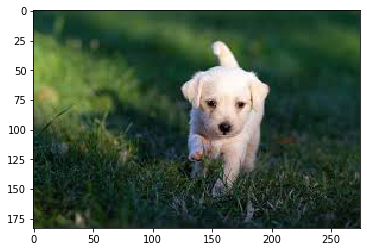

In [63]:
import imageio
from skimage.transform import resize
 
my_image = "dog.jpeg"   # change this to the name of your image file 

# We preprocess the image to fit in algorithm.
fname = "images/" + my_image
image = imageio.imread(fname)
image = image/255

my_image= resize(np.asarray(image), (num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

## 8 - Finalize Cat classifier and Save the model  ##

In [45]:
# Feature of Entire Image Dataset
X=np.append(train_set_x , test_set_x, axis=1) #Dimension of X is now (12288, 259)

In [54]:
#Image label/Output
y=np.append(train_set_y , test_set_y, axis=1) #Dimension of y is now (1, 259)

In [60]:
def finalize_model(X,y, num_iterations = 1000, learning_rate = 0.005, print_cost=False):
   
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X, y, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    d = {"costs": costs, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [65]:
cat_clf= finalize_model(X,y, num_iterations = 2000, learning_rate = 0.005, print_cost=False)
   

## Saving the Cat Classifier Model to it Use in Streamlit App  ##

In [66]:
import joblib

# Save the final Cat classifier model as a pickle in a file
joblib.dump(cat_clf, "Cat_Clf_model.pkl")

['Cat_Clf_model.pkl']